## 1. Collect Data and Import Lbraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dia = pd.read_csv('diabetes.csv')

In [3]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [5]:
dia.shape

(2000, 9)

In [6]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2. DATA ANALYSIS

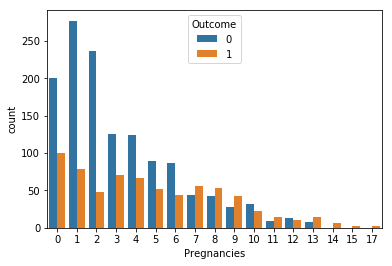

In [7]:
sns.countplot(x='Pregnancies', hue='Outcome', data=dia);

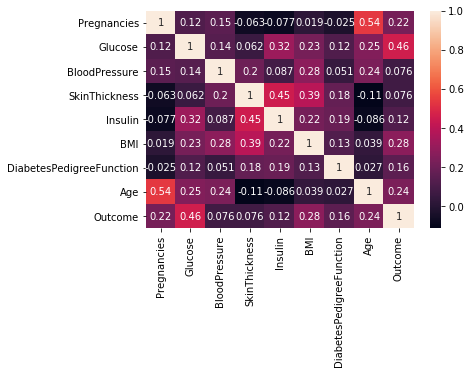

In [8]:
sns.heatmap(dia.corr(),annot=True);

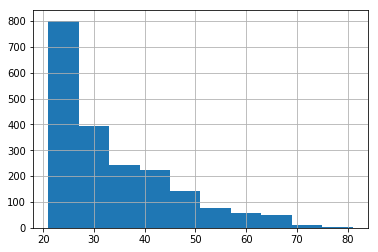

In [9]:
dia.Age.hist()

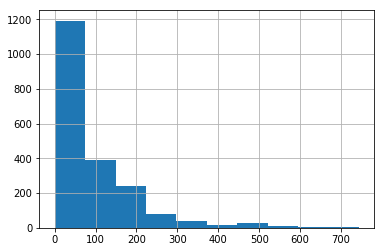

In [10]:
dia.Insulin.hist();

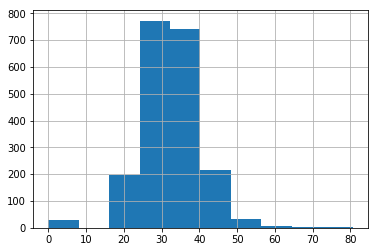

In [11]:
dia.BMI.hist();

## 3. Data Wrangling

#### Values of columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin' cannot be accepted as ZERO as it will affect the outcome.
#### We can replace such values with the mean of that column bu first calculating the mean of individual column without Zero or by making it NAN in place of zero and then put mean value there.

In [12]:
i = ['Glucose','BMI', 'Insulin', 'BloodPressure', 'SkinThickness']

In [13]:
for i in zero_not_accepted:
    dia[i]= dia[i].replace(0, np.NaN)
    mean = int(dia[i].mean(skipna=True))
    dia[i] = dia[i].replace(np.NaN, mean)

NameError: name 'zero_not_accepted' is not defined

## 4. Train Data

In [ ]:
X = dia.iloc[:,0:8]
y = dia.iloc[:,8]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [ ]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
svm_model = svm.SVC()

In [ ]:
svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
classification_report(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

## 5. Accuracy Check

In [ ]:
accuracy_score(y_test,y_pred)